# 03_finite_difference_heat_conduction

Problem Statement — 1D Steady Heat Conduction (Finite Difference Method)

In this problem, we solve the **steady-state one-dimensional heat conduction equation** using the **finite-difference method (FDM)**.

### Governing Equation
The 1D steady-state heat conduction equation without heat generation is given by:

$$
\frac{d^2 T}{dx^2} = 0
$$

where \( T(x) \) is the temperature distribution along a rod of length \( L \).

### Boundary Conditions
The rod has **Dirichlet boundary conditions** (fixed temperatures) at both ends:

$$
T(0) = T_L, \quad T(L) = T_R
$$

### Objective
1. Discretize the domain into \( N \) uniform grid points and apply the **central finite-difference approximation**:

$$
\frac{T_{i-1} - 2T_i + T_{i+1}}{\Delta x^2} = 0
$$

2. Formulate the resulting system of linear algebraic equations in matrix form:

$$
A \, T = b
$$

where \( A \) is a tridiagonal matrix and \( b \) incorporates the boundary conditions.

3. Solve the system using **NumPy’s linear solver** (`np.linalg.solve`).

4. Plot the **numerical temperature distribution** and compare it with the **analytical solution**:

$$
T(x) = T_L + \frac{T_R - T_L}{L} \, x
$$

### Expected Outcome
- A linear temperature profile between \( T_L \) and \( T_R \).
- Numerical and analytical solutions should match closely, validating the finite-difference formulation.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

L = 10 # Length of rod = 10 m
N = 10 # number of internal nodes
TL = 100 # bndry temp. on the left (°C)
TR = 300 # bndry temp. on the right (°C)

dx = L / (N+1) # grid space

# Finite Difference Discretization

A = np.zeros((N, N))
b = np.zeros(N)

for i in range(N):
    A[i,i] = -2

    if i > 0:
        A[i, i-1] = 1
        
    if i < N-1:
        A[i, i+1] = 1

b[0] = -TL
b[-1] = -TR

# Solving Linear System of Equations

T_int = np.linalg.solve(A, b)

T = np.concatenate(([TL], T_int, [TR])) # TL is just value ; converted into array using [TL]. Similarly for TR

x = np.linspace(0, L, N + 2)

# Analytical solution for comparison
T_analytical = TL + (TR - TL) * x / L


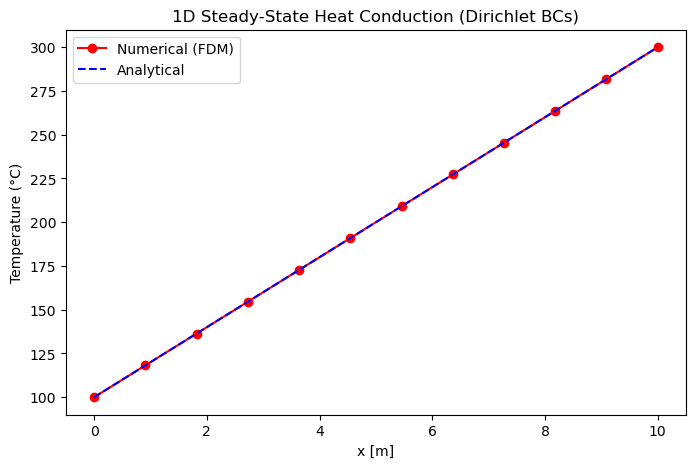

Grid points: [ 0.          0.90909091  1.81818182  2.72727273  3.63636364  4.54545455
  5.45454545  6.36363636  7.27272727  8.18181818  9.09090909 10.        ]

Numerical solution (°C): [100.   118.18 136.36 154.55 172.73 190.91 209.09 227.27 245.45 263.64
 281.82 300.  ]

Analytical solution (°C): [100.   118.18 136.36 154.55 172.73 190.91 209.09 227.27 245.45 263.64
 281.82 300.  ]


In [5]:
# Plotting 

plt.figure(figsize=(8,5))
plt.plot(x, T, 'ro-', label='Numerical (FDM)')
plt.plot(x, T_analytical, 'b--', label='Analytical')
plt.xlabel("x [m]")
plt.ylabel("Temperature (°C)")
plt.title("1D Steady-State Heat Conduction (Dirichlet BCs)")
plt.legend()
plt.show()

print("Grid points:", x)
print("\nNumerical solution (°C):", np.round(T, 2))
print("\nAnalytical solution (°C):", np.round(T_analytical, 2))